# Logistc Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

## Dataset

In [4]:
dataset = datasets.fetch_kddcup99(subset='SA', as_frame=True)
print(dataset['DESCR'])

.. _kddcup99_dataset:

Kddcup 99 dataset
-----------------

The KDD Cup '99 dataset was created by processing the tcpdump portions
of the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,
created by MIT Lincoln Lab [2]_. The artificial data (described on the `dataset's
homepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was
generated using a closed network and hand-injected attacks to produce a
large number of different types of attack with normal activity in the
background. As the initial goal was to produce a large training set for
supervised learning algorithms, there is a large proportion (80.1%) of
abnormal data which is unrealistic in real world, and inappropriate for
unsupervised anomaly detection which aims at detecting 'abnormal' data, i.e.:

* qualitatively different from normal data
* in large minority among the observations.

We thus transform the KDD Data set into two different data sets: SA and SF.

* SA is obtained by simply selecting all

In [5]:
dataset['target'].value_counts()

labels
b'normal.'         97278
b'smurf.'           2348
b'neptune.'          943
b'back.'              24
b'ipsweep.'           15
b'warezclient.'       12
b'teardrop.'          12
b'satan.'             10
b'portsweep.'          7
b'pod.'                3
b'imap.'               1
b'rootkit.'            1
b'perl.'               1
Name: count, dtype: int64

In [6]:
df = dataset['frame']
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
count,100655,100655,100655,100655,100655,100655,100655,100655,100655,100655,...,100655,100655.0,100655.0,100655.0,100655.0,100655.0,100655.0,100655.0,100655.0,100655
unique,2356,3,55,9,3252,10688,2,3,2,20,...,256,101.0,99.0,101.0,58.0,92.0,55.0,101.0,101.0,13
top,0,b'tcp',b'http',b'SF',105,0,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
freq,88953,77813,61912,94122,7370,17542,100654,100640,100654,100083,...,57483,65210.0,64413.0,33794.0,50664.0,95008.0,94460.0,91137.0,91224.0,97278


In [7]:
# df.dtypes

https://www.geeksforgeeks.org/eafp-principle-in-python/

In [8]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass  # Leave as object (likely categorical)

In [9]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,100655.000000,1.006550e+05,1.006550e+05,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,...,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000
mean,209.576146,1.204294e+03,3.273169e+03,0.000010,0.000387,0.000030,0.044916,0.000179,0.695206,0.027808,...,152.006398,201.414435,0.840862,0.055407,0.153082,0.023410,0.009692,0.008668,0.057740,0.055902
std,1337.485998,3.734369e+04,3.694750e+04,0.003152,0.033206,0.009456,0.867272,0.020426,0.460322,3.978394,...,103.450328,87.907549,0.311190,0.177655,0.306114,0.049423,0.091521,0.088304,0.225239,0.219374
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.460000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,40.000000,168.000000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.320000e+02,3.910000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,174.000000,255.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.170000e+02,2.013000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,0.090000,0.030000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,5.133876e+06,5.134218e+06,1.000000,3.000000,3.000000,30.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.decode('utf-8').astype('category')

In [11]:
df.describe(include=['category'])

,protocol_type,service,flag,labels
count,100655,100655,100655,100655
unique,3,55,9,13
top,tcp,http,SF,normal.
freq,77813,61912,94122,97278


## EDA 
(only for the categorical variables)

In [12]:
for col in df.select_dtypes('category').columns:
    print(df[[col]].value_counts(), end='\n\n')

protocol_type
tcp              77813
udp              19191
icmp              3651
Name: count, dtype: int64

service    
http           61912
smtp            9599
private         8270
domain_u        5862
other           5646
ftp_data        3805
ecr_i           2696
urp_i            537
finger           468
eco_i            401
ntp_u            380
ftp              380
auth             220
telnet           220
pop_3             81
time              53
IRC               42
urh_i             14
X11                9
shell              4
ldap               4
domain             4
discard            3
sql_net            3
ctf                3
nntp               3
printer            2
uucp_path          2
rje                2
tim_i              2
mtp                2
ssh                2
systat             2
remote_job         1
uucp               1
supdup             1
tftp_u             1
name               1
red_i              1
imap4              1
bgp                1
csnet_ns         

## Feature Engineering

### OneHot Encoding

In [13]:
import sklearn.preprocessing as skp
import sklearn.model_selection as sms

Before we do any fit on the data, we do a train/test split:

In [14]:
train_df, test_df = sms.train_test_split(df, random_state=23)

#### OneHotEncoder

In [15]:
ohot = skp.OneHotEncoder(
    sparse_output=False,
    #drop = 'first', # default: None
    handle_unknown =  'infrequent_if_exist', #'infrequent_if_exist', # default: 'error', other option: 'ignore'
    min_frequency = 10 # default: None 
)

#### OneHotEncoding of protocol

In [16]:
oh_protocol = ohot.fit_transform(train_df[['protocol_type']])
oh_protocol

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

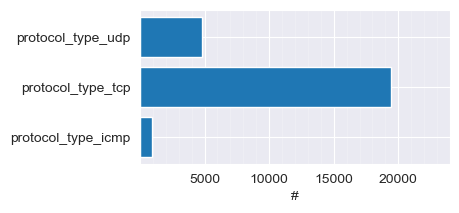

In [17]:
oh_protocol = ohot.transform(test_df[['protocol_type']])

features = ohot.get_feature_names_out()

fig, ax = plt.subplots(1,1, figsize=(4,2))
ax.barh(
    y = range(len(features)),
    width = oh_protocol.sum(axis=0)
)
_ = ax.set_yticks(range(len(features)), features)
_ = ax.set_xticks([5_000, 10_000, 15_000, 20_000])
_ = ax.set_xticks(range(0, 25_000, 1_000), minor=True)
_ = ax.set_xlabel('#')
_ = ax.grid(True)
_ = ax.grid(True, which='minor', alpha=0.2)

#### OneHotEncoding of Service

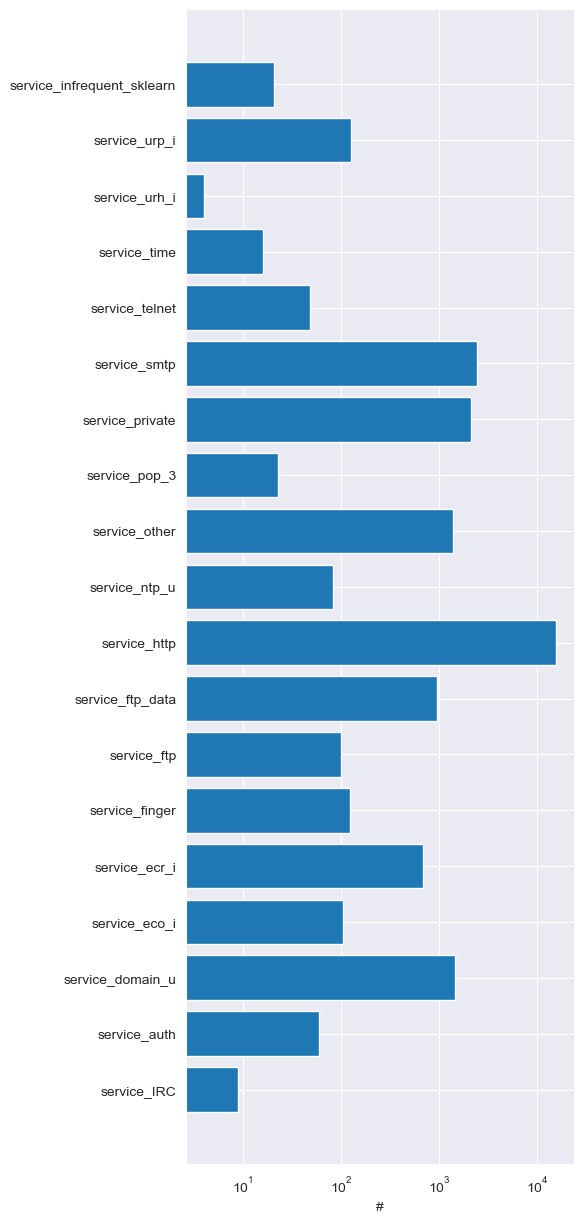

In [18]:
plt.figure(figsize=(5,15))

ohot.fit(train_df[['service']])
oh_service = ohot.transform(test_df[['service']])

features = ohot.get_feature_names_out()

plt.barh(
    y = range(len(features)),
    width = oh_service.sum(axis=0)
)
plt.xscale('log')
_ = plt.yticks(range(len(features)), features)
_ = plt.xlabel('#')

### Pipelining Feature Processing

In [19]:
import sklearn.compose
import sklearn.pipeline as sk_pipe

categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
categorical_cols.remove('labels') # remove the target column
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

ohot = skp.OneHotEncoder(
    sparse_output=False,
    #drop = 'first', # default: None
    handle_unknown = 'infrequent_if_exist', # default: 'error', other option: 'ignore'
    min_frequency = 10 # default: None 
)

preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[
        #('numerical', "passthrough", numerical_cols),
        ('numerical', skp.StandardScaler(), numerical_cols),
        ('onehot', ohot, categorical_cols)
    ]
)
preprocessor

ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                 ['duration', 'src_bytes', 'dst_bytes', 'land',
                                  'wrong_fragment', 'urgent', 'hot',
                                  'num_failed_logins', 'logged_in',
                                  'num_compromised', 'root_shell',
                                  'su_attempted', 'num_root',
                                  'num_file_creations', 'num_shells',
                                  'num_access_files', 'num_outbound_cmds',
                                  'is_host_login', 'is_guest_login', 'count',
                                  'srv_count', 'serror_rate', 'srv_serror_rate',
                                  'rerror_rate', 'srv_rerror_rate',
                                  'same_srv_rate', 'diff_srv_rate',
                                  'srv_diff_host_rate', 'dst_host_count',
                                  'dst_host_srv_count', ...]),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               min_frequency=10,
                                               sparse_output=False),
                                 ['protocol_type', 'service', 'flag'])])

## Intrusion Classification

For now, only classify into normal and malicious traffic

In [20]:
df['binary_target'] = df['labels'] != 'normal.'

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [22]:
model = sk_pipe.Pipeline([
    ('prepro', preprocessor),
    ('classifier', log_reg)
])

In [23]:
train_df, test_df = sms.train_test_split(df, random_state=25)

In [24]:
model.fit(
    X = train_df[dataset.feature_names],
    y = train_df['binary_target']
)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes', 'land',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'num_root',
                                                   'num_file_creations',
                                                   'num_shells',
                                                   'num_access_files',
                                                   'num_outbound_cmds',
                                                   'is_host_login',
                                                   'is_guest...',
                                                   'srv_count', 'serror_rate',
                                                   'srv_serror_rate',
                                                   'rerror_rate',
                                                   'srv_rerror_rate',
                                                   'same_srv_rate',
                                                   'diff_srv_rate',
                                                   'srv_diff_host_rate',
                                                   'dst_host_count',
                                                   'dst_host_srv_count', ...]),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=10,
                                                                sparse_output=False),
                                                  ['protocol_type', 'service',
                                                   'flag'])])),
                ('classifier', LogisticRegression())])

#### Evaluation

In [25]:
import sklearn.metrics as skm

In [26]:
y_true_test = test_df['binary_target']
y_pred_test = model.predict(test_df)

y_true_train = train_df['binary_target']
y_pred_train = model.predict(train_df)

Text(0.5, 1.0, 'Test')

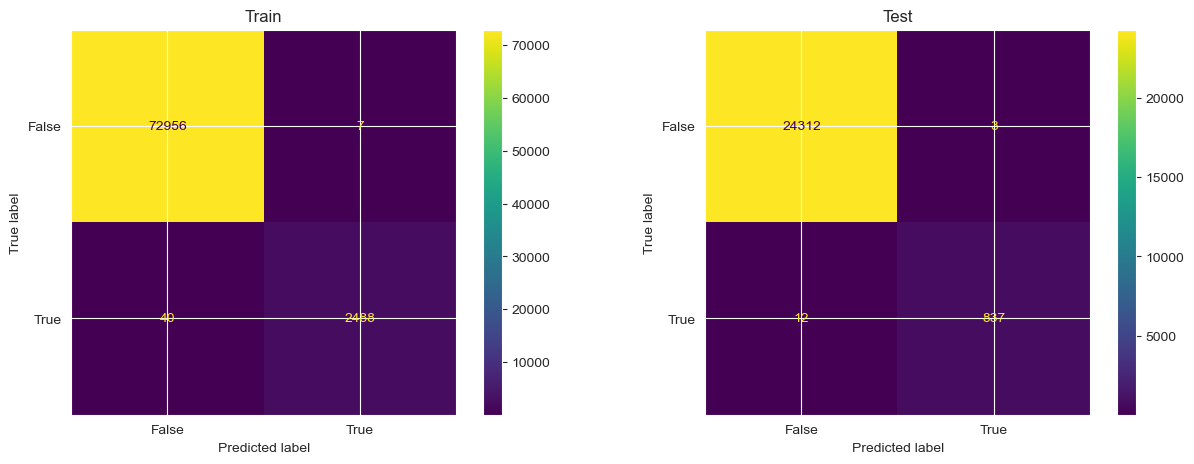

In [27]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

normalize = None 
#normalize = 'true'

_ = skm.ConfusionMatrixDisplay.from_predictions(y_true_train, y_pred_train, ax=axes[0], normalize=normalize)
axes[0].set_title('Train')

_ = skm.ConfusionMatrixDisplay.from_predictions(y_true_test, y_pred_test, ax=axes[1], normalize=normalize)
axes[1].set_title('Test')

In [28]:
print(skm.classification_report(y_true_test, y_pred_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     24315
        True       1.00      0.99      0.99       849

    accuracy                           1.00     25164
   macro avg       1.00      0.99      1.00     25164
weighted avg       1.00      1.00      1.00     25164



In [29]:
prob_train = model.predict_proba(train_df)[:, 1]

Text(0.5, 1.0, 'Training Data')

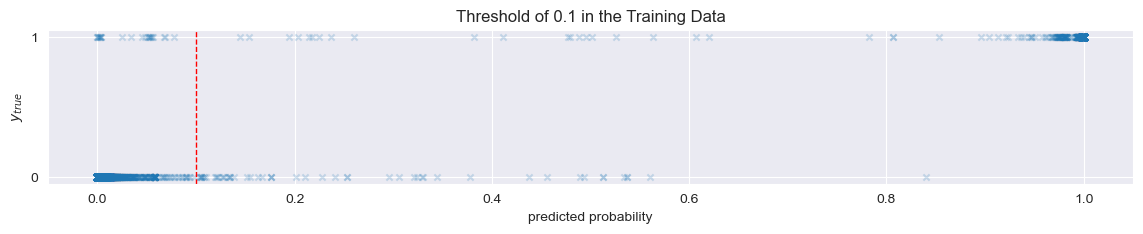

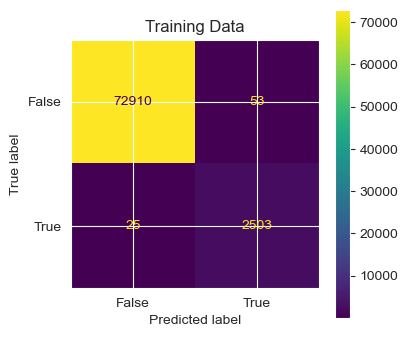

In [30]:
threshold = 0.1

fig, ax = plt.subplots(1,1,figsize=(14,2))
_ = ax.scatter(x=prob_train, y=y_true_train, s=20, alpha=0.2, marker='x')
_ = ax.axvline(x=threshold, color='red', linestyle='--', linewidth=1)
_ = ax.set_title(f'Threshold of {threshold} in the Training Data')
_ = ax.set_yticks([0,1])
_ = ax.set_ylabel('$y_{true}$')
_ = ax.set_xlabel('predicted probability')


fig, ax = plt.subplots(1,1, figsize=(4,4))
_ = skm.ConfusionMatrixDisplay.from_predictions(y_true_train, prob_train>threshold, ax=ax)
ax.set_title('Training Data')

Text(0.5, 1.0, 'Test Data')

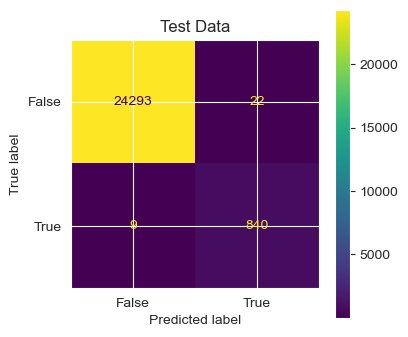

In [31]:
selected_threshold = 0.1

prob_test = model.predict_proba(test_df)[:, 1]

fig, ax = plt.subplots(1,1, figsize=(4,4))
_ = skm.ConfusionMatrixDisplay.from_predictions(y_true_test, prob_test>selected_threshold, ax=ax)
ax.set_title('Test Data')

We can visualize all thresholds at once ...

(0.98, 1.0)

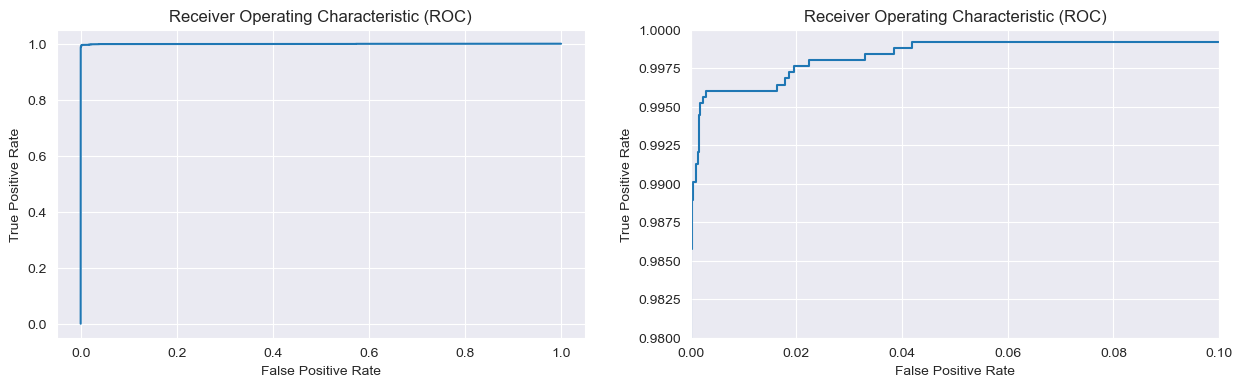

In [32]:
fpr, tpr, thresholds = skm.roc_curve(y_true_train, prob_train)

fig, axes = plt.subplots(1, 2,  figsize=(15, 4))
for ax in axes:
    ax.plot(fpr, tpr)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC)')

ax.set_xlim([0, 0.1])
ax.set_ylim([0.98, 1])

## Feature contributions

In [33]:
log_reg.coef_.flatten()

array([-8.47791791e-02,  6.62692334e-02, -3.71471351e-04, -4.97460673e-02,
        3.42847826e-01,  0.00000000e+00,  2.19744025e+00, -4.65839221e-02,
        8.21036848e-01,  4.80737088e-01,  6.07406413e-02, -2.40764011e-01,
       -3.25225144e-01, -6.67351018e-01,  7.90138230e-02, -3.02707873e-01,
        0.00000000e+00,  0.00000000e+00, -4.32955866e+00,  8.31013200e-01,
        8.47392391e-01, -1.11315183e-02,  1.41772101e-01, -7.57891251e-01,
        8.74406324e-01, -6.78191809e-01, -6.21101716e-01,  6.24223796e-01,
        1.56935448e+00, -6.64280538e-01,  1.04621345e+00,  8.27301525e-01,
        3.65907941e-01,  2.62339431e-01, -1.03774767e-01,  4.89796406e-01,
       -2.08369916e-01,  8.06523147e-01,  1.75155151e+00, -1.07052808e+00,
       -3.45567787e+00, -4.31111622e-01, -4.63185893e-01, -1.07835969e+00,
        1.63388681e+00,  9.61014642e-01, -2.11521224e-01, -2.74774235e-01,
        5.18023582e-01, -1.82474048e+00, -2.36047848e-02, -1.88318989e+00,
       -2.07237111e-01,  

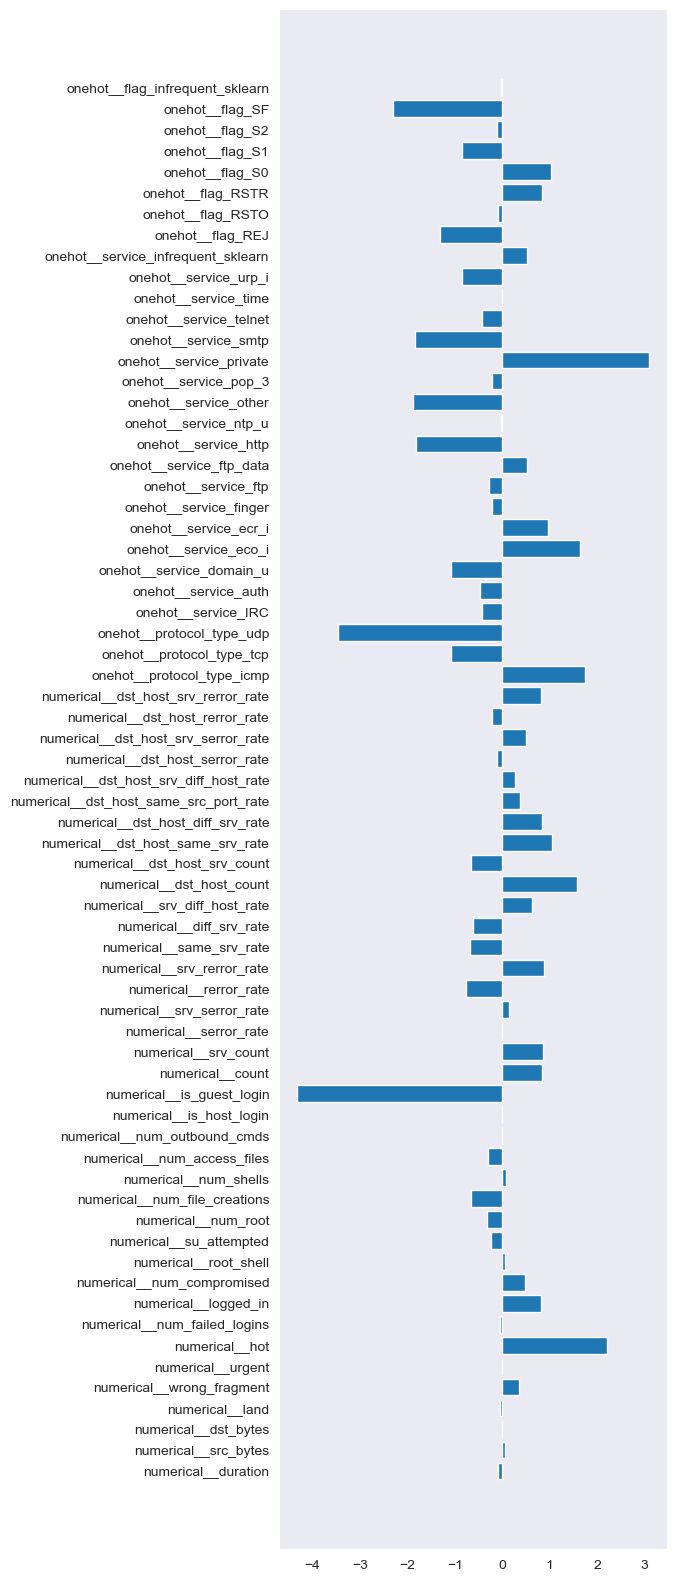

In [34]:
fig, ax = plt.subplots(1,1,figsize=(5,20))

logreg_features = preprocessor.get_feature_names_out()

plt.barh(
    y = range(len(logreg_features)),
    width = log_reg.coef_.flatten()
)
_ = plt.yticks(range(len(logreg_features)), logreg_features)
ax.grid()